# Lab 1 Notebook
written by Corey Beard ccbeard@uci.edu

This notebook will attempt to simulate Physics 52C Lab 1. Certain cells will be editable, and are meant to mimic students adjusting settings on laboratory equipment. Certain cells are uneditable, and are meant to simulate nature, producing values as read by your instrument, depending on your settings.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

## 1.4.2 Preliminaries

This next cell will imitate a compass, used to determine the direction of Earth's magnetic field.

In [2]:
#Compass
magdir = 28 + np.random.normal(2)

print(magdir)

29.43034076914053


This next cell is for changing the settings on your equipment. Feel free to edit the variables to the correct settings.

In [3]:
##########################
##    Settings    ########
##########################

#The angle of the plane of the electron beam
Beam_Angle = 28.62

#Anode Voltage (in Volts)
Anode_Voltage = 140.0

#Current through the Helmholtz Coil (in Amperes)
Coil_Current = 1.2

#The angle of the plane of the Helmholtz Coil
Coil_Angle = 21.62


This next cell represents the physics of the experiment, and **should not be edited.**

In [4]:
e = 1.6021*10**(-19) #correct electron charge
me = 9.1093*10**(-31) #correct electron mass (kg)
R = 0.64 #radius of the coils
n = 130 #number of turns in the coils 
mu0 = 4*np.pi*10**(-7) #permeability of free space  (in unit Tesla-m/Amp)
B = mu0*Coil_Current*n/((5/4)**(3/2)*R) #magnetic field of the coils
r = np.sqrt(2*Anode_Voltage/(B**2)*(me/e)) #radius of the electron beam

This next cell represents what should be seen in your experiment, and **should not be edited.**

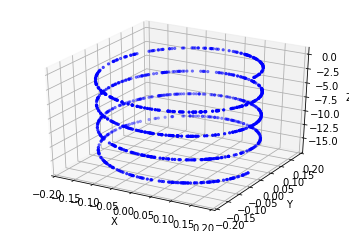

In [5]:
#Create a plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#we're going to generate a random beam of electrons
thetas = np.random.uniform(0,8*np.pi,1000)
elec_x = r*np.cos(thetas)
elec_y = r*np.sin(thetas)
elec_z = thetas*np.sin(Coil_Angle-Beam_Angle)

ax.scatter(elec_x,elec_y,elec_z,c='blue',marker='.')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## 1.4.3 Determine e/m

Feel free to go back to the settings cell, and adjust settings as directed in the lab manual. If you do so, be sure to re-run the cell with all the variable settings

In [6]:
#Have this cell spit out a helmholtz coil radius

Rlab = np.round(0.64+np.random.normal(0,0.005),3)

print('Radius of the Helmholtz Coil')
print(Rlab)

Radius of the Helmholtz Coil
0.645


In [7]:
#Have this cell give the radius of the electron beam as measured

Blab = mu0*Coil_Current*n/((5/4)**(3/2)*Rlab) #magnetic field of the coils (should be in Tesla)
rlab = np.sqrt(2*Anode_Voltage/(Blab**2)*(me/e)) + np.random.normal(0,0.005) #radius of the electron beam

print('Radius of the Electron Beam')
print(np.round(rlab,3))

Radius of the Electron Beam
0.185


The cell below calculates your measured e/m value

In [8]:
eoverm = 2*Anode_Voltage/Blab**2/rlab**2
print('e over m in units of 10^11 C/kg as measured in lab with measurement error')
print(eoverm/1e11)

e over m in units of 10^11 C/kg as measured in lab with measurement error
1.7283252219112841


The cell below is the accepted value of e/m

In [9]:
print('e over m, known values in units of 10^11 C/kg')
print(e/me/1e11)

e over m, known values in units of 10^11 C/kg
1.7587520446137463


## 1.4.4 Run the cells below 30, 100, and 1000 times and make histogram plots of of e/m for 30, 100, 1000 runs.

In [12]:
nruns = 100 #edit this number to control how many "measurements you make"
emarray = []
for i in range(nruns):
    Blab = mu0*Coil_Current*n/((5/4)**(3/2)*Rlab) #magnetic field of the coils (should be in Tesla)
    rlab = np.sqrt(2*Anode_Voltage/(Blab**2)*(me/e)) + np.random.normal(0,0.005) #radius of the electron beam
    eoverm = 2*Anode_Voltage/Blab**2/rlab**2
    emarray.append(eoverm)
EM = pd.DataFrame(emarray)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a2bf750>]],
      dtype=object)

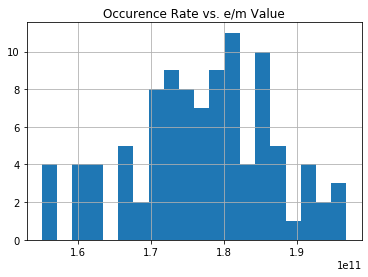

In [13]:
Plot = EM.rename(columns={0:'Occurence Rate vs. e/m Value'})
Plot.hist(label = 'e/m',bins=20)

## 1.4.5 Measure the mean, std and sem (standard error of the mean) for e/m

In [14]:
#The code below should print out the correct values for these three quantities, lucky you!
print('Mean')
print(EM.mean())
print('Standard Deviation')
print(EM.std())
print('Standard Error of Mean')
print(EM.sem())

Mean
0    1.770340e+11
dtype: float64
Standard Deviation
0    9.660018e+09
dtype: float64
Standard Error of Mean
0    9.660018e+08
dtype: float64


## 1.4.6 Quote the best measured value of e/m and its error and compared to exact known value. How different is the measued value?

## 1.4.7 Discuss Possible Errors

When finished, you can upload your completed Jupyter notebook to the canvas website. There should be an assignment called Lab 1, and you will submit this notebook as the assignment. Be sure to name it "Lab 1" followed by your first and last name, e.g. "Lab 1 Corey Beard"